# **Homework 7**



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 1a
#The independent variable would be the procedure of washing hands or not washing hands, and the dependent variable would be the survivability of the patients. 

In [5]:
#1c 
#Null Hypothesis: There is no difference in the rate of survivability between sterile and not sterile and any possible difference observed is due to chance.

In [6]:
#1d
sterile = 6/40 #represents relative risk for the sterile group
notsterile = 19/35 #represents relative risk for the control group
rrobs = sterile/notsterile
print("The observed risk is:", rrobs)

The observed risk is: 0.27631578947368424


0.0019


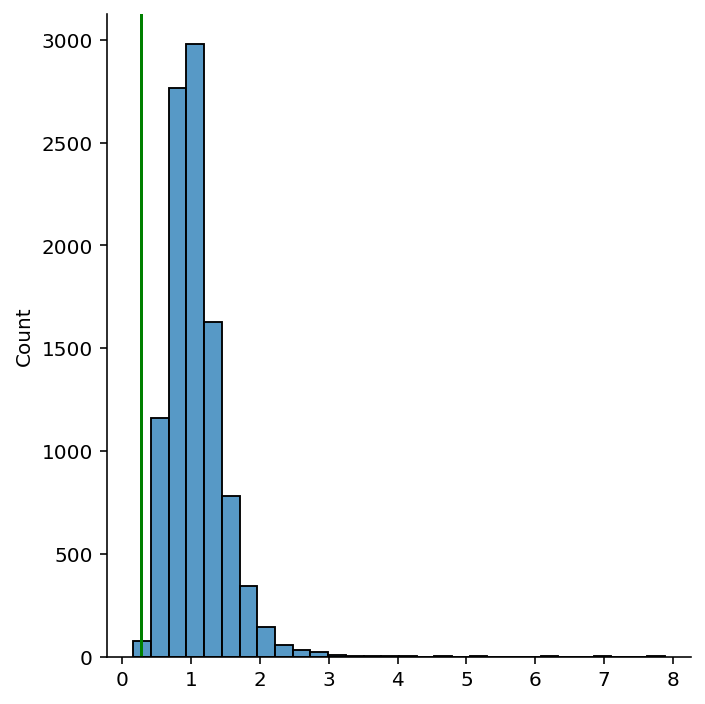

In [7]:
#1e
procedures_box = ['S']*50 + ['D']*25 #creating a box with 50 survivors and 25 deaths
results = np.zeros(10000) #list of 10000 zeros
for i in range(10000):
    sterile_sample = np.random.choice(procedures_box, 40) #takes sample of 40 out of box
    notsterile_sample = np.random.choice(procedures_box, 35) #takes sample of 35 out of box
    sterile_d_count = np.sum(sterile_sample=='D')
    notsterile_d_count = np.sum(notsterile_sample=='D')
    rrsample = (sterile_d_count/40) / (notsterile_d_count/35) #calculates relative risk of samples
    results[i]=rrsample #adds relative risk to list
    
moreExtreme = np.sum(results<=rrobs) + np.sum(results>=notsterile/sterile)
pval = moreExtreme/10000 #calculates p value
print(pval)

p=sns.displot(data = results, bins=30)
plt.axvline(rrobs, color='green')

confidence interval: 0.1110551498363133 , 1.745152354570637


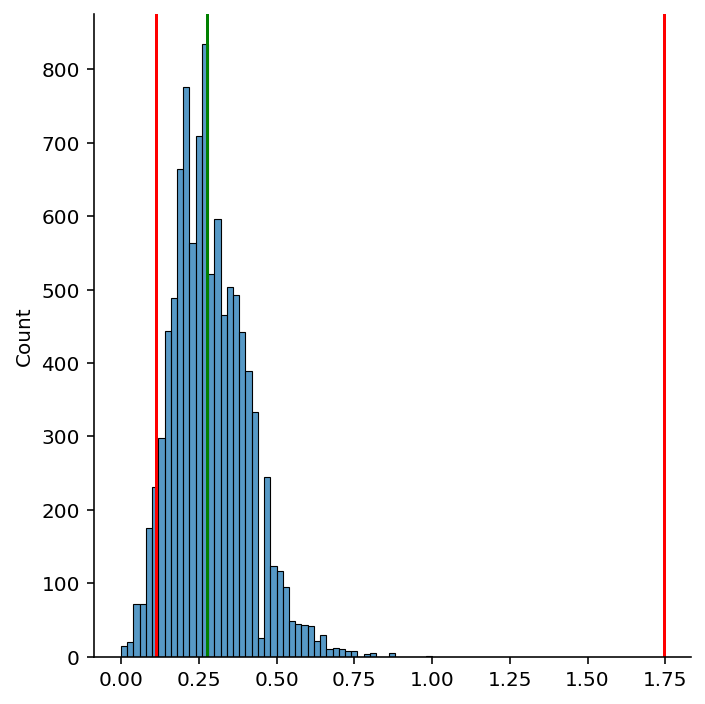

In [8]:
#1f
sterile_box = ['S']*34 + ['D']*6
notsterile_box = ['S']*16 + ['D']*19

results = np.zeros(10000)
for i in range(10000):
    sterile_sample = np.random.choice(sterile_box, 40)
    notsterile_sample = np.random.choice(notsterile_box, 35)
    sterile_d_count = np.sum(sterile_sample=='D')
    notsterile_d_count = np.sum(notsterile_sample=='D')
    rrsample = (sterile_d_count/40) / (notsterile_d_count/35) #calculates relative risk of samples
    results[i]=rrsample #adds relative risk to list

results.sort()

rr_Mlower = results[49]
rr_Mupper = results[9949]

rr_lower = np.exp(2*np.log(rrobs)-np.log(rr_Mupper))
rr_upper = np.exp(2*np.log(rrobs)-np.log(rr_Mlower))

p = sns.displot(data=results, bins=50)
plt.axvline(rr_lower, color="red")
plt.axvline(rr_upper, color="red")
plt.axvline(rrobs, color="green")

print("confidence interval:", rr_lower, ",", rr_upper)
    

#1g
NHST: Because the p-value is larger than the alpha value (0.0592>0.05), we do not have evidence to reject the null hypothesis.
Confidence Interval: We are 99% confident that the true value of relative risk will be in the interval [1.91137566132, 6.88095238095238]

#1h

We would want to use a greater than usual alpha value for this study because the p\-value is very close to the alpha value and we want to be sure that we are getting a correct anaylsis of the data. We know that cleaning instruments is \[roven to be safer in real life already. 


#2
We care about correlation because there are several possibilities (besides coincidence or p hacking: A causes B; B causes A' Feedback - A and B affect each other; A and B have common cause, C

#3
My interpretation of this finding is that these two groups are not related and do not have a direct effect on each other, regardless of what the data is saying, due to common causes. Although the \(p=0.7,p=0.001\), which shows statistically significant data and a strong positive correlation, this is due to common cause because there is no direct effect on the other. This correlation can be due to inflation, increased unionization for the two, or simply coincidence where as the years pass, inflation increases, causing alcohol prices to greatly increase and to adjust for inflation salaries to increase as well in response. This is the most probable cause. Another cause could be unionization over the years to help increase the salaries of professors and alcohol prices, because for alcohol companies, more unions equals more expensive labor, which means an adjustment is increased prices. The last possibility is pure coincidence. 


In [9]:
#5a
co2 = pd.read_csv('co2.csv')
co2

,CO2 Concentration,CO2 Uptake Rate
0,95,16.0
1,95,13.6
2,95,16.2
3,175,30.4
4,175,27.3
5,175,32.4
6,250,34.8
7,250,37.1
8,250,40.3
9,350,37.2


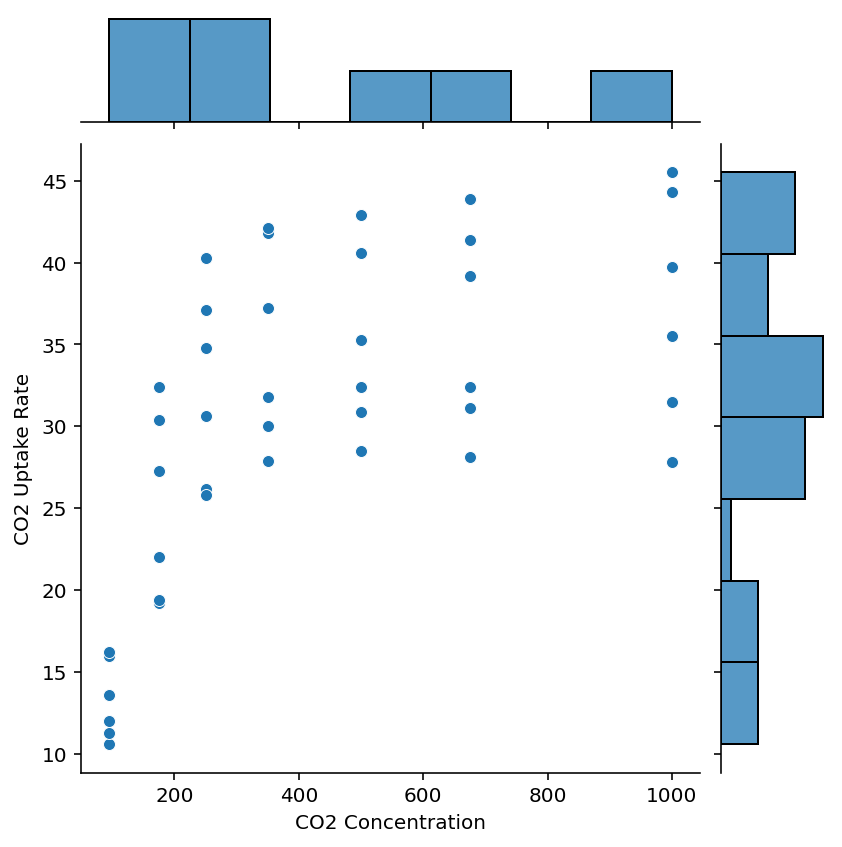

In [10]:
#5a
a = sns.jointplot(data = co2, x= "CO2 Concentration", y= "CO2 Uptake Rate")

#5b
Appropriate to calculate Spearman's correlation coefficient because the data is monotonic and Heteroscedatic. Since the data is monotonic, Y sees to increase steadily as X increases, and it also has a relatively small sample size (helps for ranking).

In [11]:
#5c
co2_corr = stats.spearmanr(co2['CO2 Concentration'], co2['CO2 Uptake Rate'])
co2_corr

SignificanceResult(statistic=0.6768225136164059, pvalue=8.605567282157638e-07)

#5d
The null hypothesis would be that the CO2 concentration has no effect on the CO2 uptake rate of the plants. The sample size would be 42 due to the number of rows in the dataset. 

0.0


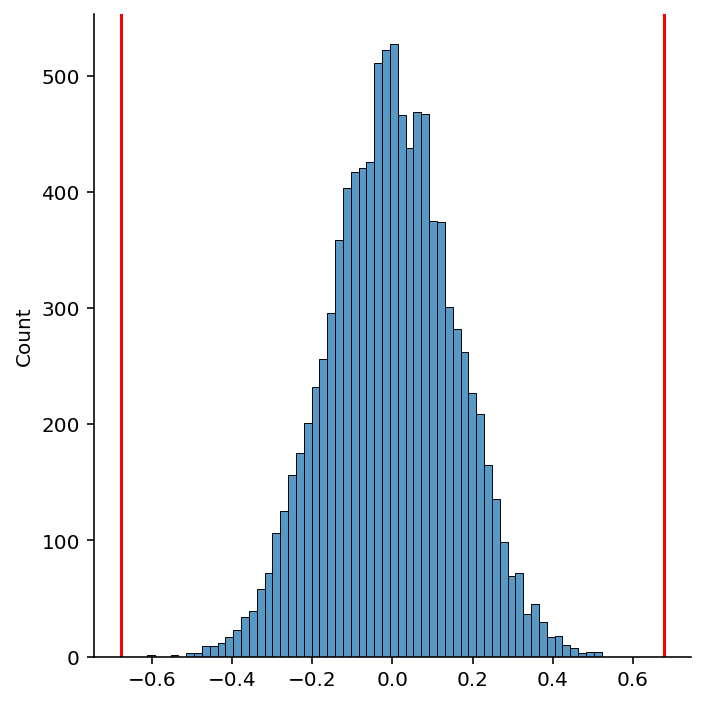

In [12]:
#5e
b=co2.copy()
co2_spear_results = np.zeros(10000)
for i in range(10000):
    c = list(b["CO2 Concentration"])
    d = list(b["CO2 Uptake Rate"])
    np.random.shuffle(c)
    spr = stats.spearmanr(c,d)
    co2_spear_results[i]=spr[0]

e = sns.displot(data=co2_spear_results)

plt.axvline(co2_corr[0], color="red")
plt.axvline(-co2_corr[0], color="red")

moreExtreme1 = np.sum(co2_spear_results>co2_corr[0]) + np.sum(co2_spear_results<-co2_corr[0])
pval1 = moreExtreme1 / 10000
print(pval1)

99% confidence interval: 0.4752644892549248 , 1.026623190422192


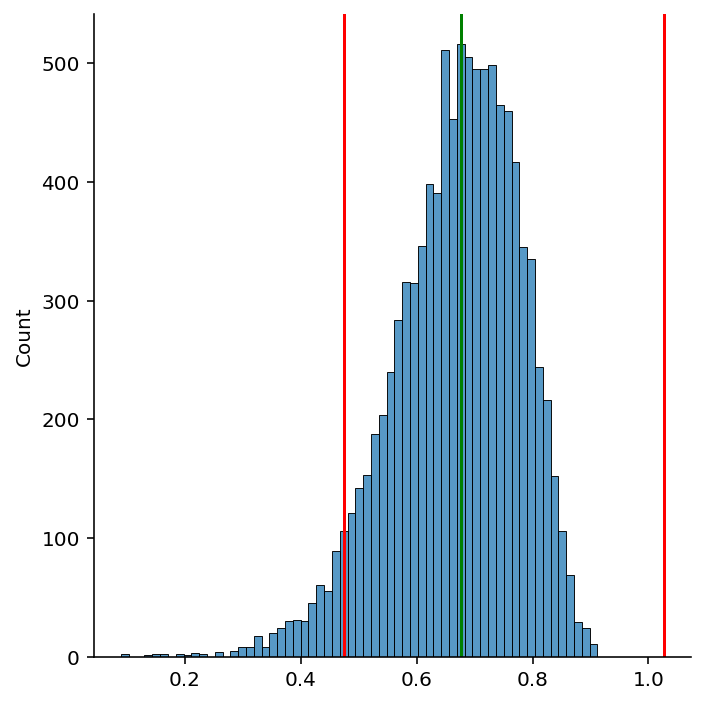

In [14]:
#5f
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

co2_spearmans = np.zeros(10000)
for i in range(10000):
    new_co2 = b.sample(len(b), replace=True)
    co2_sample = stats.spearmanr(new_co2["CO2 Concentration"], new_co2["CO2 Uptake Rate"])
    co2_spearmans[i] = co2_sample[0]

co2_spearmans.sort()
Mupper1 = co2_spearmans[9949]
Mlower1 = co2_spearmans[49]
upperbound1 = 2 * co2_corr[0] - Mlower1
lowerbound1 = 2 * co2_corr[0] - Mupper1

print("99% confidence interval:", lowerbound1, ",", upperbound1)

f = sns.displot(data=co2_spearmans)
plt.axvline(lowerbound1, color="red")
plt.axvline(upperbound1, color="red")
plt.axvline(co2_corr[0], color="green")

slope: 0.01982458312696054 y-intercept: 22.019163482629303


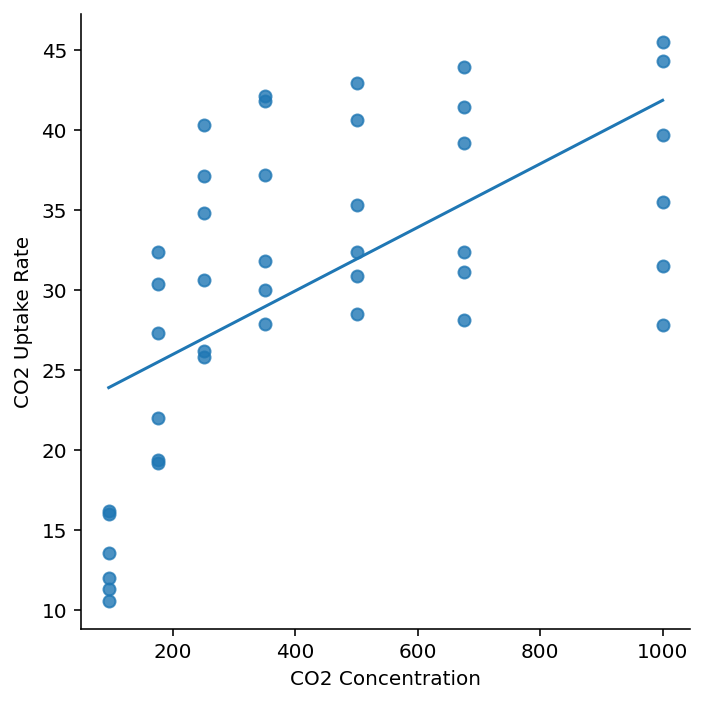

In [15]:
#5g
co2_reg = stats.linregress(co2["CO2 Concentration"], co2["CO2 Uptake Rate"])

xplot = np.linspace(min(co2["CO2 Concentration"]), max(co2["CO2 Concentration"]), 100)
yplot = co2_reg.slope*xplot + co2_reg.intercept
sns.lmplot(data=co2, x="CO2 Concentration", y="CO2 Uptake Rate", fit_reg = False)
plt.plot(xplot, yplot)

print("slope:", co2_reg.slope, "y-intercept:", co2_reg.intercept)

0.006519359634964868 0.030922824690211986


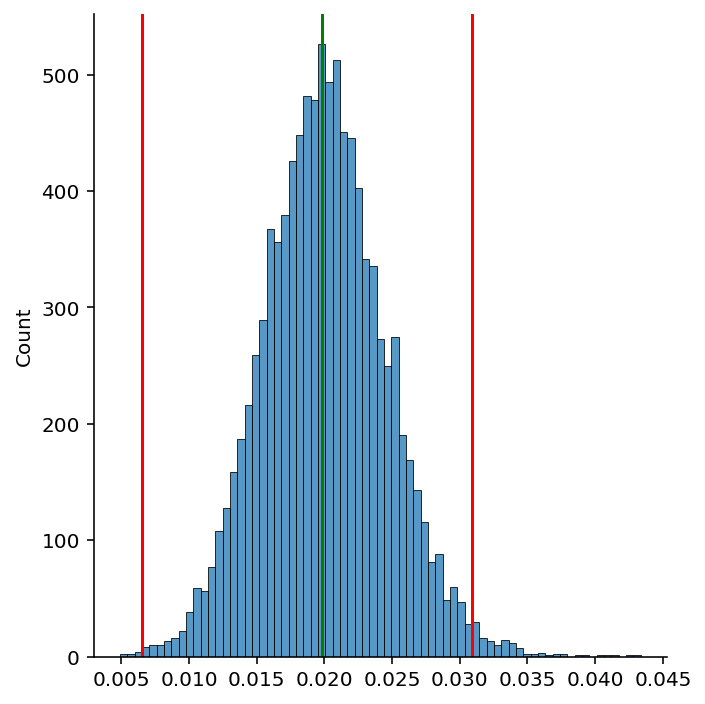

In [16]:
#5h
co2_slopes = np.zeros(10000)
for i in range(10000):
    new_co2 = b.sample(len(b), replace = True)
    newco2_reg = stats.linregress(new_co2["CO2 Concentration"], new_co2["CO2 Uptake Rate"])
    co2_slopes[i] = newco2_reg.slope
co2_slopes.sort()

Mlower1 = co2_slopes[49]
Mupper1 = co2_slopes[9949]

slopes_lower = 2*co2_reg.slope - Mupper1
slopes_upper = 2*co2_reg.slope - Mlower1

print(slopes_lower, slopes_upper) #99% confidence interval

g = sns.displot(data=co2_slopes)
plt.axvline(slopes_lower, color="red")
plt.axvline(slopes_upper, color="red")
plt.axvline(co2_reg.slope, color="green")

In [0]:
nenana = pd.read_csv('nenana.txt', sep='\t')
nenana

#5i
The p-value was found to be 0.0, meaning that the correlation between co2 concentration and uptake rate is significant, ad that co2 concentration DOES have an effect on co2 uptake rate. The 99% confidence interval for the spearman coefficient was found to be [0.475, 1.039]. However, this should stop at 1 because the spearman coefficients range from -1 to 1. This range of values shows a strong relationship between co2 concentration and co2 uptake rates. The equation of the best-fit line was calculated to be: y=0.0198*x + 22.019. The positive slope shows a positive relationship between x and y. The 99% confidence interval for the slope of best-fit line was [.00698, 0.308]. Because the values are within this interval are positive, this strongly supports a positive relationship between co2 concentration and co2 uptake rates. 

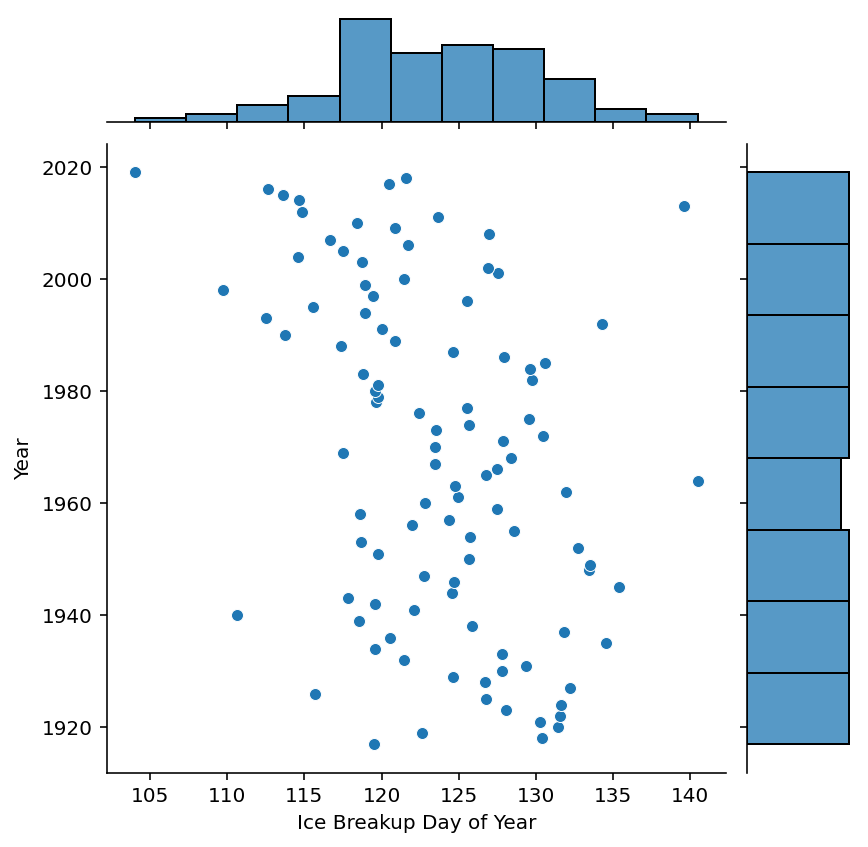

In [17]:
#6a
ice = pd.read_csv('nenana.txt', sep='\t')
h = sns.jointplot(data=ice, x="Ice Breakup Day of Year", y = "Year")

#6b
Pearson's correlation coefficient is the most appropriate to use here because the data is roughly symmetrically distributed for both x and y, and x and y are homoscedastic. 

In [18]:
#6c
ice_corr = stats.pearsonr(ice["Ice Breakup Day of Year"], ice["Year"])
ice_corr[0]

-0.3861443181590001

In [19]:
#6d
# The null hypothesis would be that the year has no effect on the day on which the river ice breaks up. The sample size wold be 103 because there are 103 rows in the dataset. 

SyntaxError: invalid syntax (692187882.py, line 2)

1.0


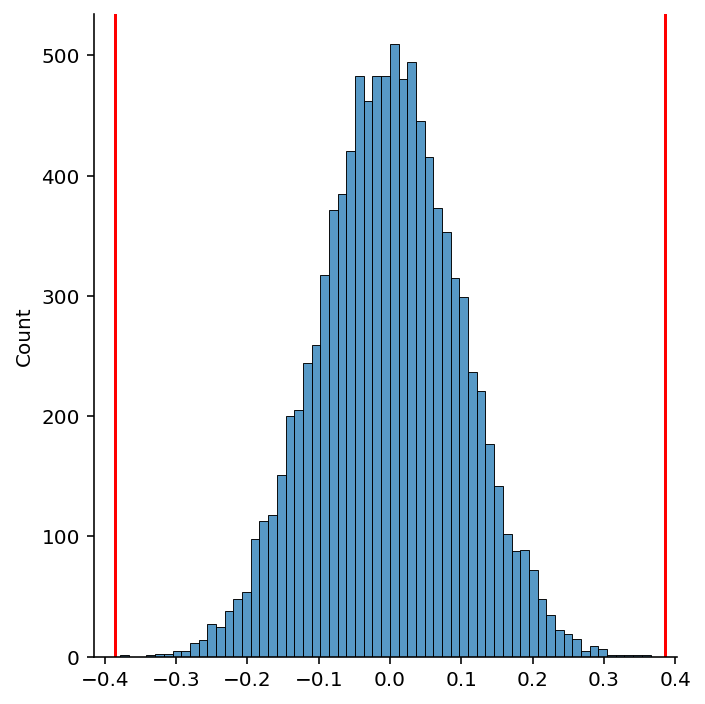

In [20]:
#6e
j = ice.copy()

ice_pear_results = np.zeros(10000)
for i in range(10000):
    k = list(j["Ice Breakup Day of Year"])
    l = list(j["Year"])
    np.random.shuffle(k)
    pcc = stats.pearsonr(k,l)
    ice_pear_results[i] = pcc[0]
    
m = sns.displot(data=ice_pear_results)
plt.axvline(ice_corr[0], color="red")
plt.axvline(-ice_corr[0], color="red")

moreExtreme3 = np.sum(ice_pear_results<ice_corr[0]) + np.sum(ice_pear_results>ice_corr[0])
pval3 = moreExtreme3/10000
print(pval3)

In [0]:
#6f
# We are not using Spearman's correlation coefficient for this problem.

In [0]:
#6g
ice_reg = stats.linregress(ice["Ice Breakup Day of Year"], ice["Year"])

xplot1 = np.linspace(min(ice["Ice Breakup Day of Year"]), max(ice["Ice Breakup Day of Year"]),100)
yplot1 = ice_reg.slope*xplot1 + ice_reg.intercept
sns.lmplot(data=ice, x="Ice Breakup Day of Year", y="Year", fit_reg = False)
plt.plot(xplot1, yplot1)

print("slope of best-fit line:", ice_reg.slope, "y-intercept:", ice_reg.intercept)

In [0]:
#6h
ice_slopes = np.zeros(10000)
for i in range(10000):
    new_ice = j.sample(len(j), replace=True)
    newice_reg = stats.linregress(new_ice["Ice Breakup Day of Year"], new_ice["Year"])
    ice_slopes[i] = newice_reg.slope
ice_slopes.sort()

Mlower3 = ice_slopes[49]
Mupper3 = ice_slopes[9949]

iceslopes_lower = 2*ice_reg.slope - Mupper3
iceslopes_upper = 2*ice_reg.slope - Mlower3

print(iceslopes_lower, ",", iceslopes_upper) #99% confidence interval

n = sns.displot(data = ice_slopes)
plt.axvline(iceslopes_lower, color="red")
plt.axvline(iceslopes_upper, color="red")
plt.axvline(ice_reg.slope, color="green")

#6i
The p-value is 0.0001, which indicates that there IS a significant relationship betwee the variables, so the null hypothesis can be rejected. Spearman's correlation coefficient was not used for this question, so the 99% confidence interval for this was not found. The equation of the line of best fit was calculated to be: y = -1.766*x + 2186.45. The negative slope indicates that the variables have a negative relationship, so as the years increase the ice breakup day of year decreases. The 99% confidence interval for the slope of the line of best fit is [-3.007, -0.580] - because the entirety of the interval is negative, this shows a negative relationship between the variables. 

In [0]:
#7a
acid_phosphatase = pd.read_csv('acid-phosphatase.csv')
p = sns.jointplot(data=acid_phosphatase, x="Temperature", y="Initial Reaction Rate")

#7b
Neither the Spearman coefficient or Pearson coefficient can be appropriately used with this data because the data does not show symmetric distributions for either variable, X and Y are not homoscedastic, and the data is not monotonic. 